In [191]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dresslar CAS522 M4 Notebook

> **Covert the SIR model (see coding assignment of Module 3) into a discrete-time system. Chose appropriate values of the parameters, and use the script available  [location] as a template for a script that iteratively generates a time series for the evolution of the system. Visualize your result as done in that notebook.**

In [192]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.shared import solve_and_plot_continuous_SIR, unpack_solution


### The Continuous SIR System, Revisted

As we recall from our notebook from the previous model, the SIR

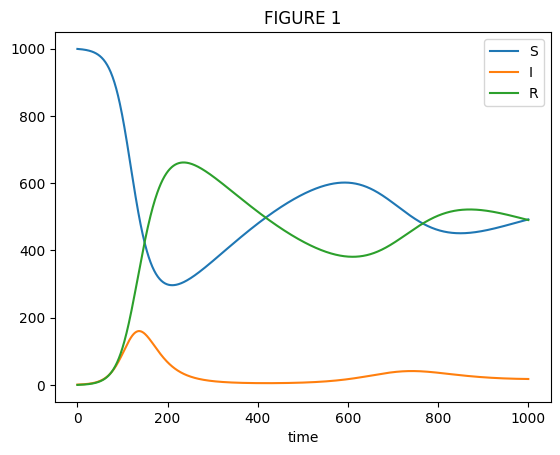

lambda_ = 0.0025: 
final value of S = 492.13550987360935 
final value of I = 17.624218763616565 
final value of R = 490.24027136277306 


In [193]:
# starting conditions with population of 1000
N = 1000
I0 = 1             # our veritable Typhoid Mary
S0 = N - I0        # 999
R0 = 0             # no recovered individuals at the start
x0 = [S0, I0, R0]

# parameters
c = 0.0001         # contact rate
r = 0.05          # recovery rate
lambda_ = 0.0025    # immunity loss rate (0.00)

# time
T = 1000

# solve and plot
x_S, x_I, x_R = solve_and_plot_continuous_SIR(
    x0,
    c,
    r,
    lambda_,
    T,
    plot_title = 'FIGURE 1'
)

continuous_model_final_values = (x_S[-1], x_I[-1], x_R[-1])
print(f"lambda_ = {lambda_}: \nfinal value of S = {x_S[-1]} \nfinal value of I = {x_I[-1]} \nfinal value of R = {x_R[-1]} ")


As we can see...

### Discretizing the model: Basic Approach

From the prior notebook, the modified equations appear as follows:

\begin{align}
\frac{dS}{dt} &= -cSI + \lambda R \\
\frac{dI}{dt} &= cSI - rI \\
\frac{dR}{dt} &= rI - \lambda R
\end{align}

Let us implement this system as a Python function. Recall that the vector `x` is used to store state vectors that our system operates on: S, I, and R.

In [194]:
def sir_with_immune_decay(x, c, r, lambda_):
    S, I, R = x
    dS = -c * S * I + lambda_ * R
    dI = c * S * I - r * I
    dR = r * I - lambda_ * R

    S = S + dS   # here we explicitly update the values of S, I, and R
    I = I + dI
    R = R + dR

    return [S, I, R]


101 data points processed.
lambda_ = 0.0025: 
final value of S = 811.570502337518 
final value of I = 87.16103609690312 
final value of R = 101.26846156557883 


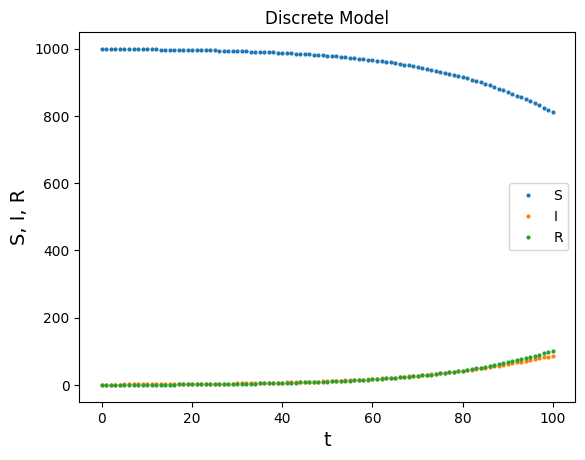

(811.570502337518, 87.16103609690312, 101.26846156557883)

In [195]:
def do_assignment(T, marker_size=0, plot_title="Discrete Model"):
    x0 = 999, 1, 0

    c = 0.0001
    r = 0.05
    lambda_ = 0.0025

    x = [x0] # initialize state vector

    for t in range(T):  # will give us t_max steps PLUS the initial condition.
        x_t = sir_with_immune_decay(x[-1], c, r, lambda_)
        # print(f"x_t = {x_i}")
        x.append(x_t)

    # in case it's helpful:
    # print(type(x), type(x[0]), type(x[0][0]), len(x), len(x[0])) 
    # <class 'list'> <class 'tuple'> <class 'int'> 1001 3

    print(f"{len(x)} data points processed.")
    print(f"lambda_ = {lambda_}: \nfinal value of S = {x[-1][0]} \nfinal value of I = {x[-1][1]} \nfinal value of R = {x[-1][2]} ")
    
    x_S = []  # unpacking... since we are using the assigned approach, our output is list of 3-value lists and we can't use unpack_solution()
    x_I = []
    x_R = []

    for j in range(T + 1):    # sooo tricky
        x_S.append(x[j][0])
        x_I.append(x[j][1])
        x_R.append(x[j][2])

    # linestyle is '-' if the markers are not shown
    ls = '-' if marker_size == 0 else ''

    plt.plot(range(T + 1),x_S, label='S', marker='o', markersize=marker_size, linestyle=ls)
    plt.plot(range(T + 1),x_I, label='I', marker='o', markersize=marker_size, linestyle=ls)
    plt.plot(range(T + 1),x_R, label='R', marker='o', markersize=marker_size, linestyle=ls)
    plt.xlabel('t',size=14)
    plt.ylabel('S, I, R',size=14)
    plt.legend()
    plt.title(plot_title)
    plt.show()

    return x_S[-1], x_I[-1], x_R[-1]

T = 100
do_assignment(T, marker_size=2)

We can see---*just barely* at this scale---that our plot shows individual points, computed as discrete values for time points `t` in `T`. We set our `T` to 100 here so we get a little bit of "action" in the plotting and yet still see individual points. 

So, we should now have faithfully completed our initial directive. However, let's go ahead and run our discrete version of the system for the complete set of 1000 steps and see how the output compares to our continuous version, above.

1001 data points processed.
lambda_ = 0.0025: 
final value of S = 491.25276834204857 
final value of I = 17.286228277611713 
final value of R = 491.46100338033835 


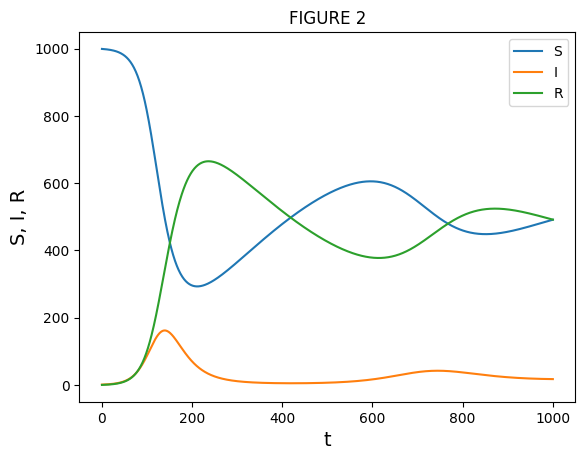

In [196]:
T = 1000
discrete_model_final_values = do_assignment(T, marker_size=0, plot_title='FIGURE 2')

If you compare the two plots (FIGURE 1 and FIGURE 2, which are continuous and discrete, respectively), the outputs look very nearly identical. However, they are not *entirely* identical: below is a comparison of the final states of both models.

In [197]:
differences = discrete_model_final_values[0] - continuous_model_final_values[0], discrete_model_final_values[1] - continuous_model_final_values[1], discrete_model_final_values[2] - continuous_model_final_values[2]  # not pretty!
percent_differences = [round(abs(diff / continuous_model_final_values[i]) * 100, 4) for i, diff in enumerate(differences)]

print(f"Absolute Differences: {differences[0]}, {differences[1]}, {differences[2]}")
print(f"Percent Differences: {percent_differences[0]}, {percent_differences[1]}, {percent_differences[2]}")

Absolute Differences: -0.8827415315607823, -0.33799048600485193, 1.2207320175652967
Percent Differences: 0.1794, 1.9178, 0.249


This difference, while small, is also very distinctly there, and it occurs because our discrete model is *estimating* change based on a method called the Forward Euler approach:

